# Instituto Tecnologico de Durango

## Analitica de Datos en las Organizaciones

## Práctica de laboratorio 4.1.3.6: Clasificación del árbol de decisiones

### Brenda Raquel Sanchez Alanis 
--------------------------------------------------------------------------------------

En esta práctica de laboratorio utilizará un modelo clasificador de árbol de decisiones para determinar quiénes sobrevivieron al desastre del crucero Titanic.

* ** Parte 1: Crear un clasificador de árbol de decisiones **

* ** Parte 2: Aplicar el modelo del árbol de decisiones **

* ** Parte 3: Evaluar el modelo del árbol de decisiones **

### **Aspectos básicos/situación**

En esta práctica de laboratorio creará un clasificador de árbol de decisiones que funcione con un conjunto de datos que contenga detalles sobre los más de 1300 pasajeros que estaban a bordo del trasatlántico Titanic durante su trágico primer viaje.

### **Recursos necesarios**

* 1 PC con acceso a Internet

* Bibliotecas de Python: pandas, sklearn y IPython.display

* Aplicación adicional: Graphviz

* Archivos de datos: titanic-train.csv, titanic-test.csv, titanic_all.csv
-----------------------------------------------------------------------------------------------------------------------

### **Parte 1: Crear un clasificador de árbol de decisiones**

En esta práctica de laboratorio creará un clasificador de árbol de decisiones que captará información de un conjunto de datos rotulado.

El conjunto de datos contiene los nombres y los datos demográficos de todos los pasajeros. Además, se incluyen los detalles de viaje de los pasajeros. De estos datos, podemos crear un árbol de decisiones que ilustre los factores que contribuyeron a la supervivencia, o a la falta de ella, en el viaje.

Los conjuntos de datos contienen las siguientes variables:

Variable ---------------------------------------------------------------------------    Descripción
1. PassengerID--------------------------------------------------- Identificación única para todos los pasajeros
2. Survival	------------------------------------------------------ ¿El pasajero sobrevivió? (0 = No; 1 = Sí)
3. Pclass ------------------------------------------------------- Clase de ticket del pasajero. (1 = 1º; 2 = 2º; 3 = 3º)
4. Nombre ------------------------------------------------------- Nombre del pasajero. (apellido, nombre)
5. Género ------------------------------------------------------- Male o female
6. Edad	--------------------------------------------------------- Edad en años. Principalmente números enteros con valores flotantes para niños menores de un año.
7. SibSp -------------------------------------------------------- Cantidad de hermanos o cónyuge a bordo.
8. Parch -------------------------------------------------------- Cantidad de padres o niños a bordo.
9. Ticket ------------------------------------------------------- Número de ticket
10. Fare -------------------------------------------------------- La tarifa abonada por ticket en libras esterlinas antes de 1970
11. Cabin ------------------------------------------------------- Número de cabina
12. Embarked ---------------------------------------------------- Puerto de embarque (C = Cherbourg; Q= Queenstown; S = Southampton)

Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?


R = 
1. ¿Cuantas mujeres sobrevivieron?
2. ¿Cuantos hombres sobrevivieron?
3. ¿Cuantos niños y niñas iban a bordo?
4. ¿Cuantas personas menores de 30 años no sobrevivieron?
5. ¿Cuantas mujeres con hijos (as) iban a bordo?
**entre otras**

#### **Paso 1: Crear la estructura de datos**

**a) Importe pandas y el archivo csv**

Primero, importe pandas y cree una estructura de datos del conjunto de datos de entrenamiento del Titanic, que se encuentra en el archivo titanic-train.csv.titanic-train.csv. Siga el método pd.read_csv().

In [1]:
import pandas as pd 

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("./Data/titanic-train.csv")

**b) Verifique la importación y analice los datos**

In [2]:
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


¿Faltan valores en el conjunto de datos?

R = SI

In [3]:
#view the first few rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


#### **Paso 2: Preparar los datos para el modelo de árbol de decisiones**

**a) Reemplace los datos de la cadena por etiquetas numéricas**

Utilizaremos scikit-learn para crear árboles de decisiones. El modelo del árbol de decisiones que utilizaremos solo puede administrar datos numéricos. Los valores para la variable Gender (Género) se deben transformarse en representaciones numéricas. 0 se utilizará para representar el valor "masculino" y 1 para el valor "femenino".

En este código, se utiliza una expresión lambda con el método de estructura de datos apply(). Esta expresión lambda representa una característica que utiliza una instrucción condicional para reemplazar los valores de texto de las columnas por el valor numérico correspondiente. La instrucción de la lambda se puede interpretar de la siguiente manera: "Si el parámetro toLabel es ‘male’, colocar 0; si el valor es otro, colocar 1". El método apply() ejecutará esta función en los valores de cada fila de la columna "Gender" de la estructura de datos.

In [4]:
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

**b) Verifique que la variable Gender haya cambiado.**

El resultado debe mostrar valores de 0 o 1 para la variable Gender en el conjunto de datos.

In [5]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


**C) Aborde la ausencia de valores en el conjunto de datos.**

El resultado del método info() que mencionamos más arriba indicó que aproximadamente 180 observaciones no tienen el valor de la edad. El valor de la edad es importante para nuestro análisis. Debemos abordar estos valores faltantes de alguna manera. Si bien no es lo ideal, podemos reemplazar estos valores de edad faltantes por el promedio de edad para todo el conjunto de datos.

Esto se logra mediante la aplicación del método fillna() en la columna "Age" ("Edad") del conjunto de datos. El método fillna() cambiará la estructura de datos original mediante el argumento inplace = True.

In [6]:
training["Age"].fillna(training["Age"].mean(), inplace=True)

**d) Verifique que se hayan reemplazado los valores.**

In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    int64  
 5   Age          915 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?

In [8]:
#use code to answer the question above
training["Age"].mean()

29.970867208672033

#### **Paso 3: Entrenar y calificar el modelo del árbol de decisiones.**

**a) Cree un objeto de arreglo con la variable que será el objetivo del modelo.**

El propósito del modelo es clasificar a los pasajeros como sobrevivientes o víctimas fatales. El conjunto de datos identifica sobrevivientes y víctimas fatales. El modelo deducirá qué valores variables de entrada tienen más probabilidad de pertenecer a las víctimas fatales y a los sobrevivientes. Luego, usted podrá utilizar dicha información para clasificar pasajeros de un conjunto de datos único de prueba.

In [9]:
#create the array for the target values
y_target = training["Survived"].values

**b) Cree el arreglo de valores que será la entrada para el modelo.**

Solo algunas de las funciones de datos son útiles para crear el árbol clasificador. Creamos una lista de las columnas a partir de los datos que deseamos que el clasificador utilice como variables de entrada y luego creamos un arreglo con el nombre de la columna de esa variable. La variable X_input contiene los valores para todas las funciones que utilizará el modelo para deducir cómo hacer las clasificaciones. Una vez que el modelo esté entrenado, utilizaremos esta variable para asignar estas etiquetas al conjunto de datos de prueba.

In [10]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

**c) Crear el modelo programado.**

Importe el módulo del árbol de decisiones desde la biblioteca de aprendizaje automático sklearn. Cree el objeto clasificador clf_train. A continuación, utilice el método fit() del objeto clasificador con la variables X_input e y_target como parámetros para entrenar el modelo.

In [11]:
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

**d) Evalúe el modelo.**

Utilice el método score() del objeto del árbol de decisiones para mostrar la precisión del porcentaje de las asignaciones realizadas por el clasificador. Este método considera las variables de entrada y salida como argumentos.

In [12]:
clf_train.score(X_input,y_target)

0.8163934426229508

Este valor de calificación indica que las calificaciones realizadas por el modelo deberían ser correctas aproximadamente el 82 % de las veces.

#### **Paso 6: Visualizar el árbol**

**a) Cree el resultado del archivo intermedio.**

Importe el módulo sklearn.externals.six StringIO que se utiliza para generar las características del árbol de decisiones en un archivo. Crearemos un archivo dot de Graphviz que nos permitirá exportar los resultados del clasificador en un formato que se puede convertir en gráfico.

In [13]:
#from sklearn.externals.six import StringIO
with open("./Data/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

**b) Instale Graphviz.**

Para visualizar el árbol de decisiones, Graphviz debe instalarse desde una terminal. La instalación requiere responder una pregunta emergente, lo cual no se puede hacer desde una celda de código de una libreta de anotaciones. Utilice el comando apt-get install graphviz de la línea de comando de la terminal para instalar este software.

**c) Convierta el archivo intermedio en gráfico.**

El archivo dot que se creó anteriormente se puede convertir en un archivo .png con el procesador dot de Graphiz. Este es un comando shell, así que utilice ! antes de él para ejecutarlo desde esta libreta de anotaciones. El nuevo archivo de imagen titanic.png deberá aparecer en el directorio que contiene esta libreta de anotaciones.

In [14]:
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng ./Data/titanic.dot -o ./Data/titanic.png

**D) Muestre la imagen.**

Ahora importaremos el módulo Image desde la biblioteca IPython.display. Esto permitirá que abramos y visualicemos un archivo gráfico externo en la página de la libreta de anotaciones. La función Image se utiliza para visualizar el archivo, con el del archivo .png como argumento.

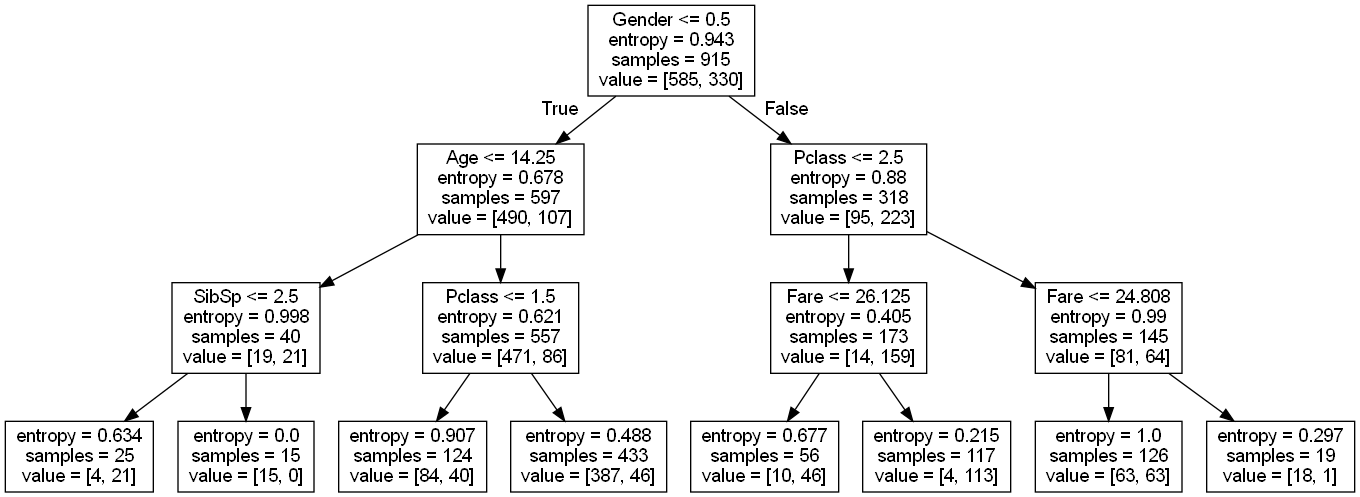

In [15]:
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("./Data/titanic.png")

**e) Interprete el árbol.**

En el árbol entrenado, podemos ver varias cosas. Primero, en su raíz, está la variable Gender, que indica que es el único factor más importante al realizar la clasificación. Las ramas hacia la izquierda son para Gender = 0 o masculino. La raíz y cada nodo intermedio contienen el factor de decisión, la entropía y la muestra de pasajeros que cumplen con criterio en ese punto del árbol. Por ejemplo, el nodo raíz indica que hay 915 observaciones que conforman el conjunto de datos de aprendizaje. En el siguiente nivel, podemos ver que 597 personas eran de género masculino y 318 de género femenino. Para la rama femenina del árbol, en el siguiente nivel hacia abajo, podemos ver que de los 318 pasajeros de género femenino, 173 eran pasajeros de primera o segunda clase (Pclass<=2.5000) y 145 eran de tercera clase. Luego, de los 145 pasajeros de género femenino de tercera clase, 126 pagaron una tarifa inferior a 24.8 por su ticket, mientras que 19 pagaron más de ese monto.

Por último, en los nodos de hojas, que están en la fila inferior del árbol, podemos ver valores emparejados entre corchetes que indican el número de víctimas fatales y de sobrevivientes para la clasificación específica de pasajeros. Por ejemplo, para los pasajeros de género femenino de tercera clase que pagaron menos de 24.8, la cantidad de víctimas fatales y sobrevivientes sumaba 63. De esos mismos pasajeros que pagaron más de 24.8, 18 fallecieron y 1 sobrevivió.

La entropía es una medida de ruido en la decisión. El ruido se puede ver como incertidumbre. Por ejemplo, en los nodos en los que la decisión brinda valores iguales en el arreglo de valores de sobrevivientes, la entropía se encuentra en su valor más alto posible, que es 1.0. Esto significa que el modelo no pudo tomar, de forma definitiva, la decisión de clasificación según las variables de entrada. Para los valores de la entropía muy baja, la decisión era mucho más clara, y la diferencia en la cantidad de sobrevivientes y víctimas fatales es mucho mayor.

¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?

------------------------

### **Parte 2: Aplicar el modelo del árbol de decisiones**


En esta parte de la práctica de laboratorio, usaremos los resultados del modelo del árbol de decisiones programado para etiquetar un conjunto de datos sin etiquetas de pasajeros del Titanic. El árbol de decisiones evaluará las características de cada observación y etiquetará la observación como sobreviviente (etiqueta = 1) o víctima fatal (etiqueta = 0).

#### **Paso 1: Importar y elaborar los datos**

En este paso, importará y preparará los datos para el análisis.

**a) Importe los datos.**

Coloque el nombre “prueba” a la estructura de datos e importe el archivo titanic-test.csv.

In [16]:
#import the file into the 'testing' dataframe.
testing = pd.read_csv("./Data/titanic-test.csv")

¿Cuántos registros hay en el conjunto de datos?

R = 393

¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

R = Age faltan 86, Cabin faltan 93 y Embarked faltan 2

In [17]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


**b) Utilice una expresión lambda para reemplazar los valores “male” y “female” por 0 para masculino y 1 para femenino.**

In [18]:
#replace the Gender labels in the testing dataframe
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

**c) Reemplace los valores de edad faltantes por el promedio de las edades.**

In [19]:
#Use the fillna method of the testing dataframe column "Age" 
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

**d) Verifique que se hayan reemplazado los valores.
Verifique que se hayan completado los valores faltantes y que las etiquetas de Gender sean 0 y 1.**

In [20]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    int64  
 5   Age          393 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 37.0+ KB


In [21]:
testing.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S


#### **Paso 2: Etiquetar el conjunto de datos de prueba**

En este paso, aplicará el modelo programado al conjunto de datos de prueba.

**a) Cree un arreglo de variables de entrada a partir del conjunto de datos de prueba.**

In [22]:
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

**b) Aplique el modelo al conjunto de datos de prueba.**

Utilice el método predict() del objeto clf_train que se entrenó para etiquetar las observaciones en el conjunto de datos de prueba con la clasificación de supervivencia más probable. Considere el arreglo de variables de entrada del conjunto de datos de prueba como el parámetro para este método.

In [23]:
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set

**c) Evalúe la precisión de las etiquetas estimadas.**

La realidad sobre la supervivencia de cada pasajero se encuentra en otro archivo llamado all_data.csv. Para seleccionar únicamente los pasajeros incluidos en el conjunto de datos de prueba, combinamos la estructura de datos target_labels y la estructura de datos all_data del campo Name. Después, comparamos la etiqueta estimada con la estructura de datos real y computamos la precisión del modelo programado.

In [24]:
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./Data/titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result

---------------------------------------------------------------------------------------------------------------------------
### **Parte 3: Evaluar el modelo del árbol de decisiones**

La biblioteca de sklearn incluye un módulo que se puede utilizar para evaluar la precisión del modelo del árbol de decisiones. El método train_test_split() particionará las observaciones del conjunto de datos completo en dos arreglos de observaciones seleccionados de forma aleatoria que conforman los conjuntos de datos de prueba y entrenamiento. Después de ajustar el modelo según los datos de entrenamiento, se podrá calificar el módulo entrenado y se podrá comparar la precisión de predicción tanto para los conjuntos de datos de entrenamiento como para los de prueba. Es recomendable que los dos puntajes sean cercanos, pero la precisión para el conjunto de datos de prueba es, generalmente, más baja que para el conjunto de datos de entrenamiento.

#### **Paso 1: Importar los datos**

Esta vez, importaremos los datos desde una archivo csv, pero especificaremos las columnas que deseamos que aparezcan en la estructura de datos. Haremos esto pasando por una lista de nombres de columnas similar a un arreglo hasta el parámetro usecols del método read_csv(). Utilice las siguientes columnas: "Survived", "Fare", "Pclass", "Gender", "Age" y "SibSP". Cada una debe estar entre comillas y la lista debe estar entre corchetes. Coloque el nombre all_data a esta estructura de datos.

In [25]:
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("./Data/titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


¿Cuántos registros hay en el conjunto de datos?

R = 1308

¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

R = Age faltan 263

#### **Paso 2: Explicar los datos.**

**a) Elimine las cadenas "male" y "female" y reemplácelas por 0 y 1 respectivamente.**

In [26]:
all_data["Gender"] = all_data["Gender"].apply(lambda tolabel: 0 if tolabel == 'male' else 1)

**c) Reemplace los valores de edad faltantes por el promedio de edad de todos los miembros del conjunto de datos.**

In [27]:
#replace missing Age values with the mean age
all_data["Age"].fillna(all_data["Age"].mean(), inplace = True)
#display the first few rows of the data set
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


#### **Paso 2: Crear las variables de entradas y salida para el conjunto de datos de entrenamiento y prueba**

La biblioteca sklearn incluye módulos que ayudan con la selección del modelo. Importaremos desde sklearn.model_selection el método train_test_split(). Este método dividirá automáticamente el conjunto de datos completo y devolverá un total de cuatro arreglos numpy, dos para las características (prueba y validación) y dos para las etiquetas (prueba y validación). Un parámetro del método especifica la proporción de observaciones que se utilizarán para la prueba y el entrenamiento. Otro parámetro especifica un valor semilla que se utilizará para seleccionar de forma aleatoria la asignación de la observación para la prueba o el entrenamiento. Esto se utiliza para que otro usuario pueda replicar su trabajo al recibir las mismas asignaciones de observaciones para los conjuntos de datos. La sintaxis del método es la siguiente:

```train_test_split(input_X, target_y, test_size=0.4, random_state=0)```

El 40 % de los datos se utilizará para pruebas. El valor semilla aleatorio está configurado en 0.

**a) Designe las variables de entrada y las variables de salida y genere arreglos.**

In [28]:
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.model_selection import train_test_split
#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [29]:
type(X_train)

numpy.ndarray

**b) Entrene el modelo y adáptelo a los datos de prueba.**

Ahora el modelo se puede adaptar nuevamente. El modelo se entrenará solo con los datos de entrenamiento, según seleccionó la función train_test_split.

In [30]:
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

**c) Compare modelos mediante la calificación de cada uno de ellos.
Siga el método score() de cada objeto del árbol de decisiones para generar puntajes.

In [31]:
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


Ahora, hemos comparado los puntajes para el modelo entrenado en ambos datos de prueba y validación. Tal como se previó, el puntaje de precisión de prueba está cerca, pero es menor que el puntaje de los datos de entrenamiento. Esto se debe a que, normalmente, el modelo tiende sobreadaptarse a los datos de entrenamiento y, por lo tanto, el puntaje de prueba representa una mejor evaluación de cómo el modelo puede generalizar fuera de los datos de entrenamiento.

-------------------------------------------------------------------
### **Parte 4 para estudio adicional (opcional)**

Si tiene tiempo y le interesa, puede intentar lo siguiente y ver cómo el árbol de decisiones se ve afectado.

1. Eliminar las observaciones con valores de edad faltantes

El uso de un promedio para reemplazar los valores de edad faltantes puede afectar la precisión del modelo. Una solución para esto puede ser eliminar todas las observaciones con valores de edad faltantes. Si bien esto reducirá el tamaño del conjunto de datos de entrenamiento, podría mejorar la precisión.

2. Eliminar las variables de entrada

Otro problema con este tipo de análisis es la identificación de las variables de entrada, o las funciones, que son esenciales para la precisión del clasificador. Una forma de hacerlo es intentar ejecutar el clasificador para distintos grupos de variables de entrada editando la lista de variables que se utiliza para adaptar el modelo.